### Ch 4 - Classification

#### 4.0 Intro

- Regression assumes quantitative outputs. Classification is for categorical/qualitative outputs.

#### 4.1 Overview

- Section just shows an example of classification for Credit Card defaulting given datapoints about balance and income

#### 4.2 Why not Linear Regression?

- It would not make sense to assign eg. 3 independent outcomes 1, 2, 3 because that assumes that the difference between 1 and 2 is the same as the difference between 2 and 3 (which is not the case if they're independent by definition!)
- If there was a natural order (such as mild, moderate, severe), then a 1, 2, 3 coding would be reasonable but for most classification purposes, this isnt't the case.
- For a binary (two level) qualitative response, a 0/1 coding is feasible, classifying on the border of hat Y > or < 0.5. Regression by least squares is possible, but some results would be outside of the [0, 1] interval, making them hard to interpret as probabilities. We achieve similar results from a binary linear regression model if we use linear discriminant analysis.


In summary:
- A regression model cannot accomodate a qualitative response with >2 classes
- A regression method will not provide meaningful estiamtes of Pr(Y|X) even with two classes.

#### 4.3 Logistic Regression

- Logistic regression models the probability that Y belongs to a particular category
- Pr(Y = 1|X) eg. Pr(default = Yes|balance) 
    - Abbreviated as p(X), ranges [0, 1]
    - Classification can be set as p(X) > or < 0.5, but the specific threshold can be changed depending on interpretation eg. p(balance) > 0.1 instead of 0.5 for predicting defaulting.
  

- If we used linear regression, we might expect the range to be out of [0, 1]. To avoid this, we must model p(X) with a function such that  $0 < f(X) < 1, \forall X$
- In logistic regression, we use the logistic function:
$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$

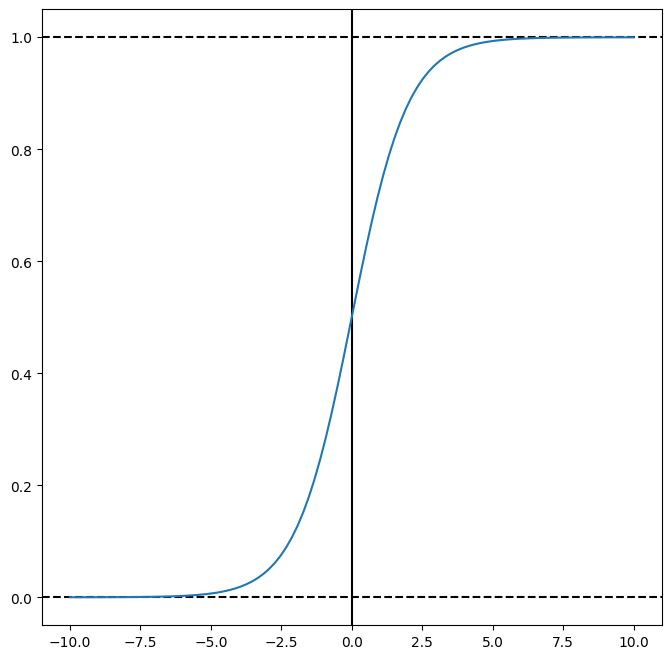

In [10]:
from matplotlib.pyplot import subplots
import numpy as np

X = np.linspace(-10,10,100)
Y = np.exp(X)/(1+np.exp(X))
fig, ax = subplots(figsize=(8,8))
ax.axvline(x=0, color='black')
ax.axhline(y=0, color = 'black', ls='--')
ax.axhline(y=1, color = 'black', ls='--')
ax.plot(X,Y);


- To fit the model, we use a method called maximum likelihood (discussed later). 
- After manipulation, we note that:
$$\frac{p(X)}{1-p(X)}=e^{\beta_0 + \beta_1X}$$
The expression $\frac{p(X)}{1-p(X)}$ is the odds and can take any value between 0 and inf.
- By taking log of both sides, we arrive at
$$\text{log}\left( \frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1X$$
The left side is the logit or logodds. - The logistic model has a logit linear in X. This means that increasing the X by one unit changes the log odds by beta 1 (cf linear regression, increasing X by one unit changes Y by beta 1 on average)
- If beta 1 is positive, then increasing X will increase p(X), and vice versa

**Estimating the Regression Coefficients**

- While there is a non-linear least squares method to estimate the coefficients, maximum likelihood is preferred because of "better statistical properties".
- Intuition: we want estimates for $beta_0$ and $beta_1$ such that the predicted probability $\hat{p}(x_i) is as close as possible to the observed Y from data points (eg. 0 for all datapoints for case 1 and 1 for all datapoints for case 2).
- This intution is formalised by the likelihood function:
$$\ell(\beta_0, \beta_1) = \prod_{i:y_i=1}p(x_i) \prod_{i{'}:y_{i^{'}}=0}(1-p(x_{i^{'}}))$$
This estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ to maximise the function.
- The z-statistic for logistic regression plays the same role as the t-statistic. It is equal to $\hat{\beta_1}/\text{SE}(\hat{\beta_1})$ for $\beta_1$.
  - Higher z-statistics provide evidence against H0 of beta 1 = 0. 
  - Null hypothesis implies $p(X) = \frac{e^{\beta_0}}{1+e^{\beta_0}}$, not depending on beta 1.